In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

star = pd.read_excel('datasets/star/star.xlsx')
star.head()

,tmathssk,treadssk,classk,totexpk,sex,freelunk,race,schidkn
0,473,447,small.class,7,girl,no,white,63
1,536,450,small.class,21,girl,no,black,20
2,463,439,regular.with.aide,0,boy,yes,black,19
3,559,448,regular,16,boy,no,white,69
4,489,447,small.class,5,boy,yes,white,79


In [2]:
math_scores = star['tmathssk']
type(math_scores)

pandas.core.series.Series

In [3]:
math_scores = star[['tmathssk']]
type(math_scores)

pandas.core.frame.DataFrame

In [4]:
star = star[['tmathssk','treadssk','classk','totexpk','schidkn']]
star.columns

Index(['tmathssk', 'treadssk', 'classk', 'totexpk', 'schidkn'], dtype='object')

In [5]:
star = star.drop('schidkn',axis=1)
star.columns

Index(['tmathssk', 'treadssk', 'classk', 'totexpk'], dtype='object')

In [6]:
star['new_column'] = star['tmathssk'] + star['treadssk']
star.head()

,tmathssk,treadssk,classk,totexpk,new_column
0,473,447,small.class,7,920
1,536,450,small.class,21,986
2,463,439,regular.with.aide,0,902
3,559,448,regular,16,1007
4,489,447,small.class,5,936


In [7]:
star = star.rename(columns = {'new_column':'ttl_score'})
star.columns

Index(['tmathssk', 'treadssk', 'classk', 'totexpk', 'ttl_score'], dtype='object')

In [8]:
star.sort_values(by=['classk','tmathssk']).head()

,tmathssk,treadssk,classk,totexpk,ttl_score
309,320,360,regular,6,680
1470,320,315,regular,3,635
2326,339,388,regular,6,727
2820,354,398,regular,6,752
4925,354,391,regular,8,745


In [9]:
# Sort by class size ascending and math score descending
star.sort_values(by=['classk','tmathssk'], ascending=[True,False]).head()

,tmathssk,treadssk,classk,totexpk,ttl_score
724,626,474,regular,15,1100
1466,626,554,regular,11,1180
1634,626,580,regular,15,1206
2476,626,538,regular,20,1164
2495,626,522,regular,7,1148


In [10]:
small_class = star['classk'] == 'small.class'
small_class.head()

0     True
1     True
2    False
3    False
4     True
Name: classk, dtype: bool

In [11]:
star_filtered = star[small_class]
star_filtered.shape

(1733, 5)

In [12]:
star.shape

(5748, 5)

In [13]:
star_filtered = star[star['treadssk'] >= 500]

star_filtered.shape

(233, 5)

In [14]:
# Find all records with reading score at least 500 and in small class
star_filtered = star[(star['treadssk']>=500) & (star['classk']=='small.class')]
star_filtered.shape

(84, 5)

In [15]:
star_grouped = star.groupby('classk')
star_grouped

In [16]:
star_grouped[['tmathssk']].mean()

,tmathssk
classk,
regular,483.261000
regular.with.aide,483.009926
small.class,491.470283


In [17]:
star.groupby('totexpk')[['ttl_score']].max().head()

,ttl_score
totexpk,
0,1171
1,1133
2,1091
3,1203
4,1229


In [18]:
star = pd.read_excel('datasets/star/star.xlsx')
districts = pd.read_csv('datasets/star/districts.csv')
star.merge(districts, how='left').head()

,tmathssk,treadssk,classk,totexpk,sex,freelunk,race,schidkn,school_name,county
0,473,447,small.class,7,girl,no,white,63,Ridgeville,New Liberty
1,536,450,small.class,21,girl,no,black,20,South Heights,Selmont
2,463,439,regular.with.aide,0,boy,yes,black,19,Bunnlevel,Sattley
3,559,448,regular,16,boy,no,white,69,Hokah,Gallipolis
4,489,447,small.class,5,boy,yes,white,79,Lake Mathews,Sugar Mountain


In [19]:
star_pivot = pd.melt(frame=star, id_vars = 'schidkn', 
        value_vars=['tmathssk','treadssk'], value_name='score', var_name='test_type')
star_pivot.head()

,schidkn,test_type,score
0,63,tmathssk,473
1,20,tmathssk,536
2,19,tmathssk,463
3,69,tmathssk,559
4,79,tmathssk,489


In [20]:
# Rename records in `test_type`
mapping = {'tmathssk':'math','treadssk':'reading'}
star_pivot['test_type'] = star_pivot['test_type'].map(mapping)


# Find unique values in test_type
star_pivot['test_type'].unique()

array(['math', 'reading'], dtype=object)

In [21]:
star_pivot.pivot_table(index='schidkn', 
                       columns='test_type', values='score').reset_index()

test_type,schidkn,math,reading
0,1,492.272727,443.848485
1,2,450.576923,407.153846
2,3,491.452632,441.000000
3,4,467.689655,421.620690
4,5,460.084746,427.593220
...,...,...,...
74,75,504.329268,440.036585
75,76,490.260417,431.666667
76,78,468.457627,417.983051
77,79,490.500000,434.451613


<AxesSubplot:xlabel='classk', ylabel='count'>

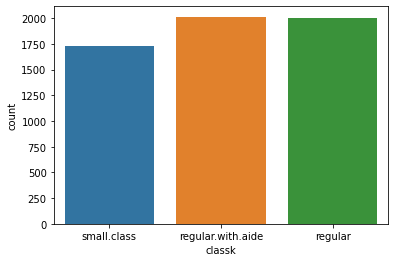

In [22]:
sns.countplot(x='classk', data=star)

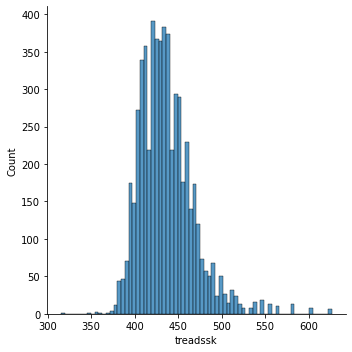

In [23]:
sns.displot(x='treadssk', data=star)

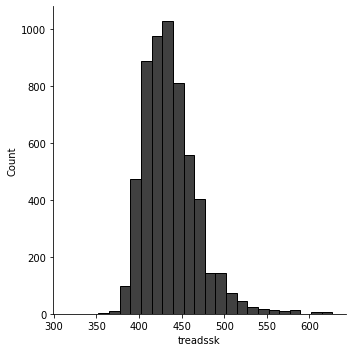

In [24]:
sns.displot(x='treadssk', data=star, bins=25, color='black')

<AxesSubplot:xlabel='treadssk'>

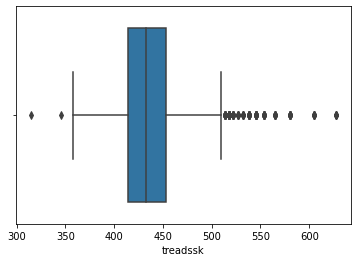

In [25]:
sns.boxplot(x='treadssk', data=star)

<AxesSubplot:ylabel='treadssk'>

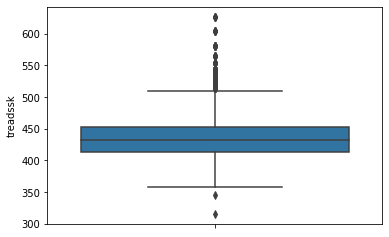

In [26]:
sns.boxplot(y='treadssk', data=star)

<AxesSubplot:xlabel='classk', ylabel='treadssk'>

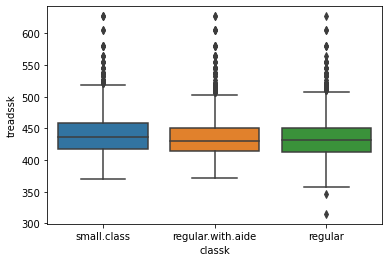

In [27]:
sns.boxplot(x='classk', y='treadssk', data=star)

<AxesSubplot:xlabel='tmathssk', ylabel='treadssk'>

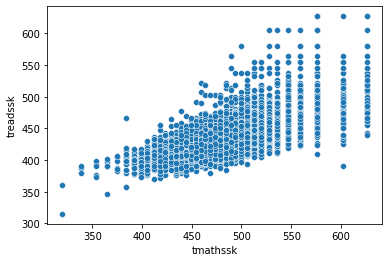

In [28]:
sns.scatterplot(x='tmathssk', y='treadssk', data=star)

Text(0.5, 1.0, 'Math score versus reading score')

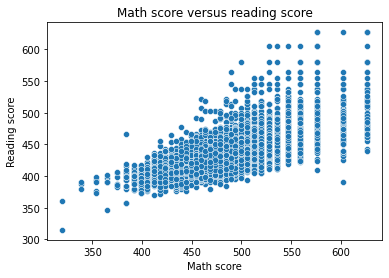

In [29]:
sns.scatterplot(x='tmathssk', y='treadssk', data=star)
plt.xlabel('Math score')
plt.ylabel('Reading score')
plt.title('Math score versus reading score')